<a href="https://colab.research.google.com/github/4GeeksAcademy/regresion_logistica_machine-learning-python-template/blob/main/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Analisis exploratorio




*   1.Planteamiento del problema y recopilación de datos




In [118]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [119]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age. Edad del cliente (numérico)  
job. Tipo de trabajo (categórico)  
marital. Estado civil (categórico)
education. Nivel de educación (categórico)  
default. ¿Tiene crédito actualmente? (categórico)  
housing. ¿Tiene un préstamo de vivienda? (categórico)  
loan. ¿Tiene un préstamo personal? (categórico)  
contact. Tipo de comunicación de contacto (categórico)  
month. Último mes en el que se le ha contactado (categórico)  
day_of_week. Último día en el que se le ha contactado (categórico)  
duration. Duración del contacto previo en segundos (numérico)  
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)  
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)  
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)  
poutcome. Resultado de la campaña de marketing anterior (categórico)  
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)  
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)  
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)  
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)  
nr.employed. Número de empleados. Indicador trimestral (numérico)  
y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)


*   2.Exploración y limpieza de datos.



In [120]:
data.shape

(41188, 21)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Histogramas de las variables categoricas que encuentro relevantes

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

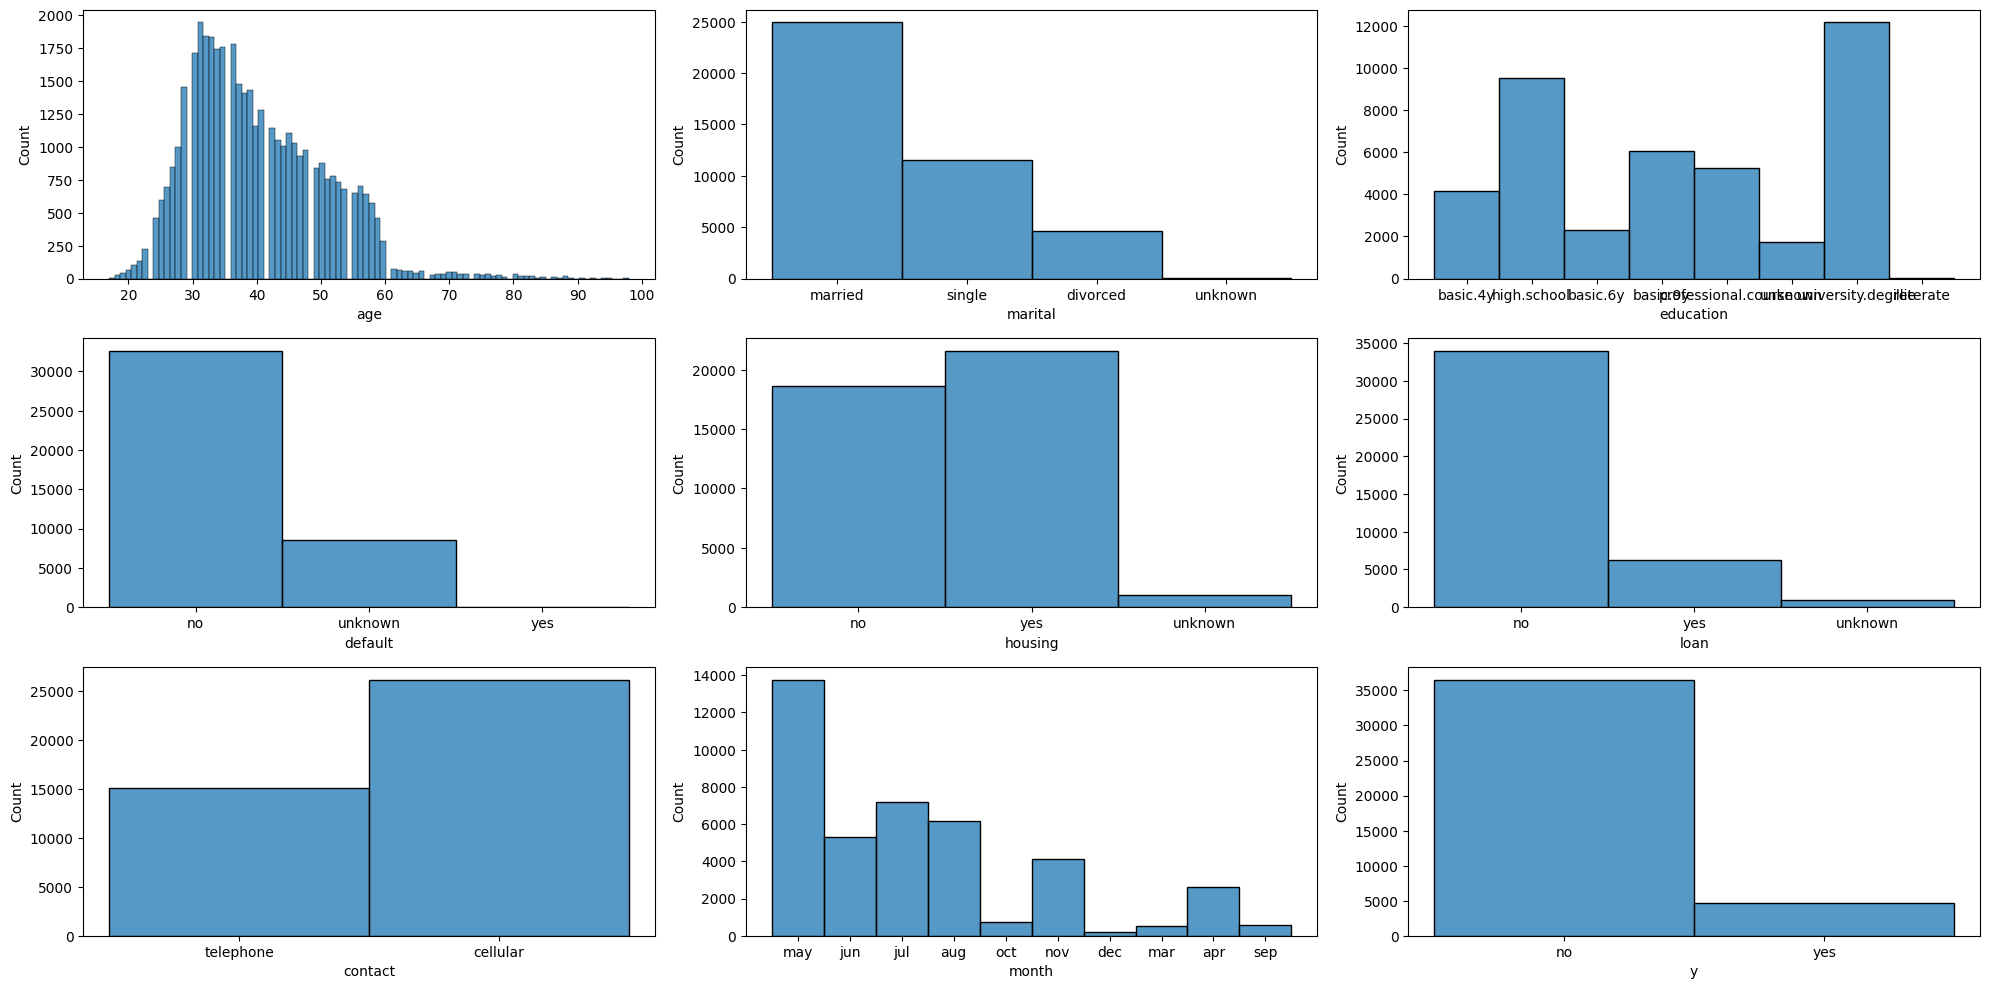

In [123]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

# Creamos los histogramas
sns.histplot(ax = axis[0,0], data = data, x = "age")
sns.histplot(ax = axis[0,1], data = data, x = "marital")
sns.histplot(ax = axis[0,2], data = data, x = "education")
sns.histplot(ax = axis[1,0], data = data, x = "default")
sns.histplot(ax = axis[1,1], data = data, x = "housing")
sns.histplot(ax = axis[1,2], data = data, x = "loan")
sns.histplot(ax = axis[2,0], data = data, x = "contact")
sns.histplot(ax = axis[2,1], data = data, x = "month")
sns.histplot(ax = axis[2,2], data = data, x = "y")


# Ajustamos el diseño para que no se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Categoricas con categoricas, y comparandolas con la variable "y" que es la que nos importa.

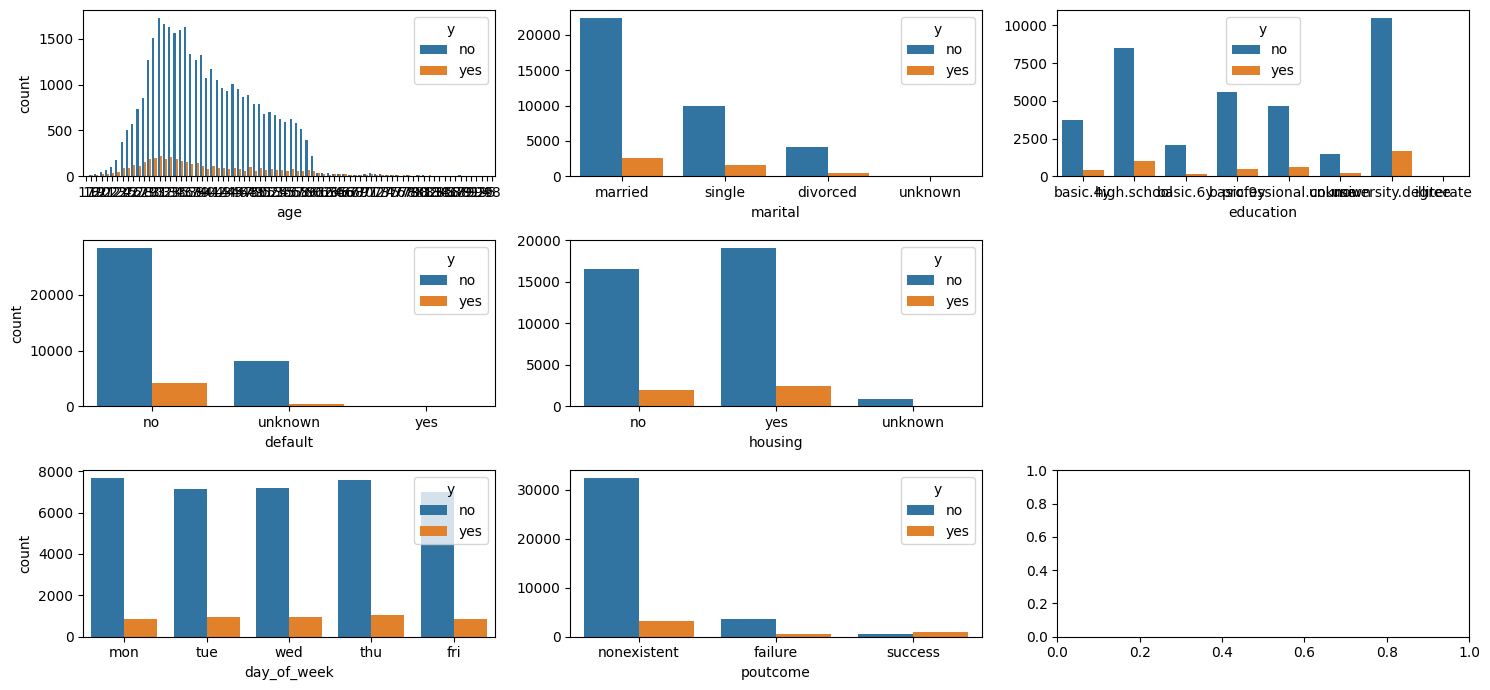

In [124]:
fig, axis = plt.subplots(3, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = data, x = "age", hue = "y")
sns.countplot(ax = axis[0, 1], data = data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = data, x = "day_of_week", hue = "y")
sns.countplot(ax = axis[2, 1], data = data, x = "poutcome", hue = "y").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

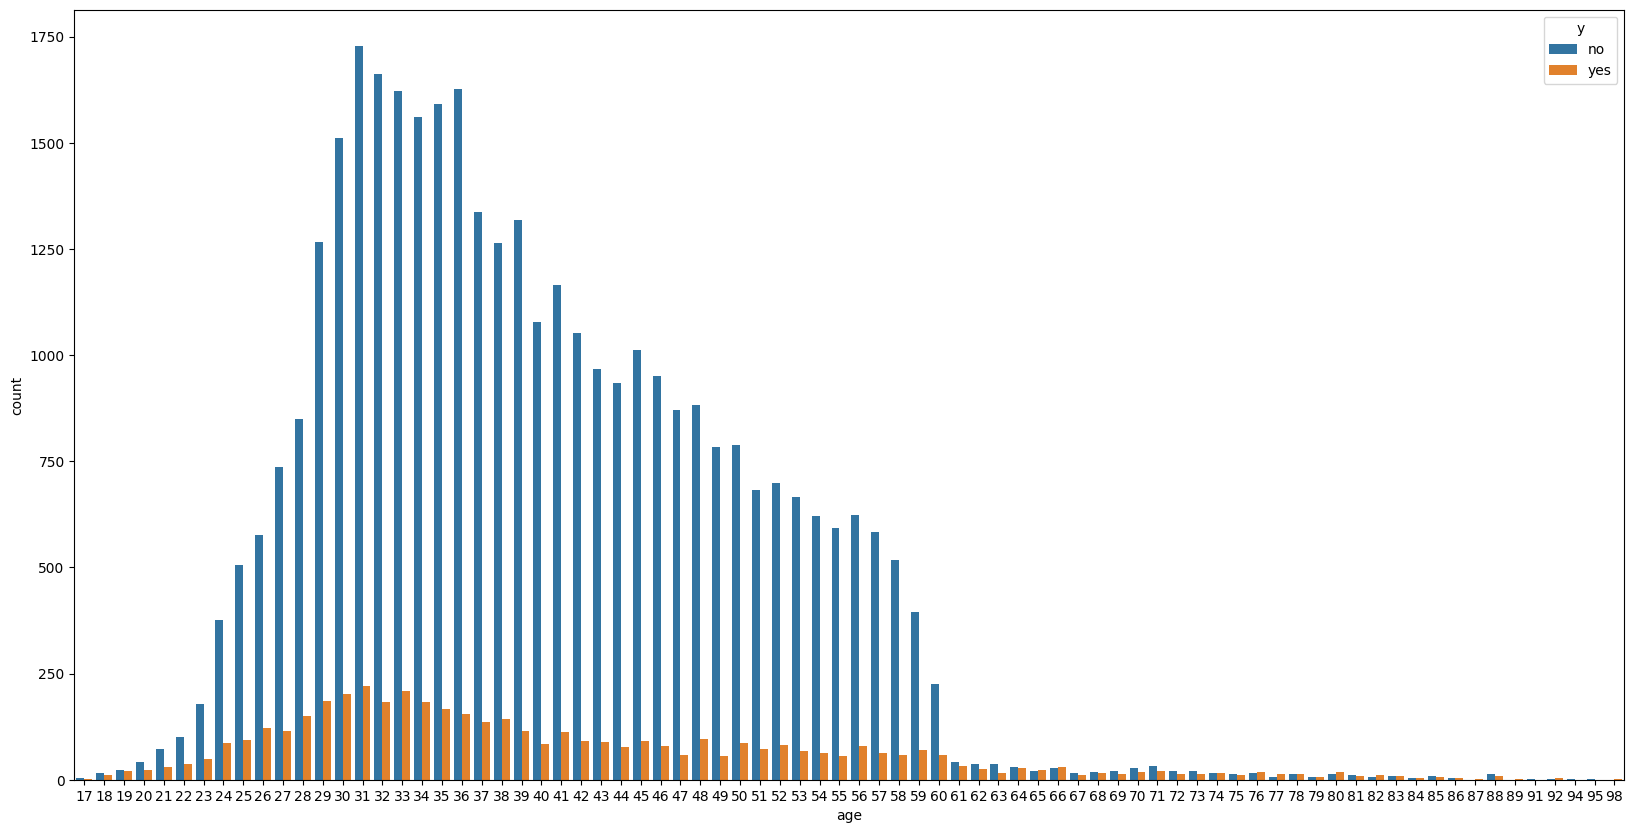

In [125]:
fig, axis = plt.subplots(figsize = (20, 10))

sns.countplot(data = data, x = "age", hue = "y")

plt.show()

Me ha parecido relevante ver la variable edad junto con la variable "y" pues se puede comprobar que el rango de edad entre 28 y 38 años es el que más lo contrata.

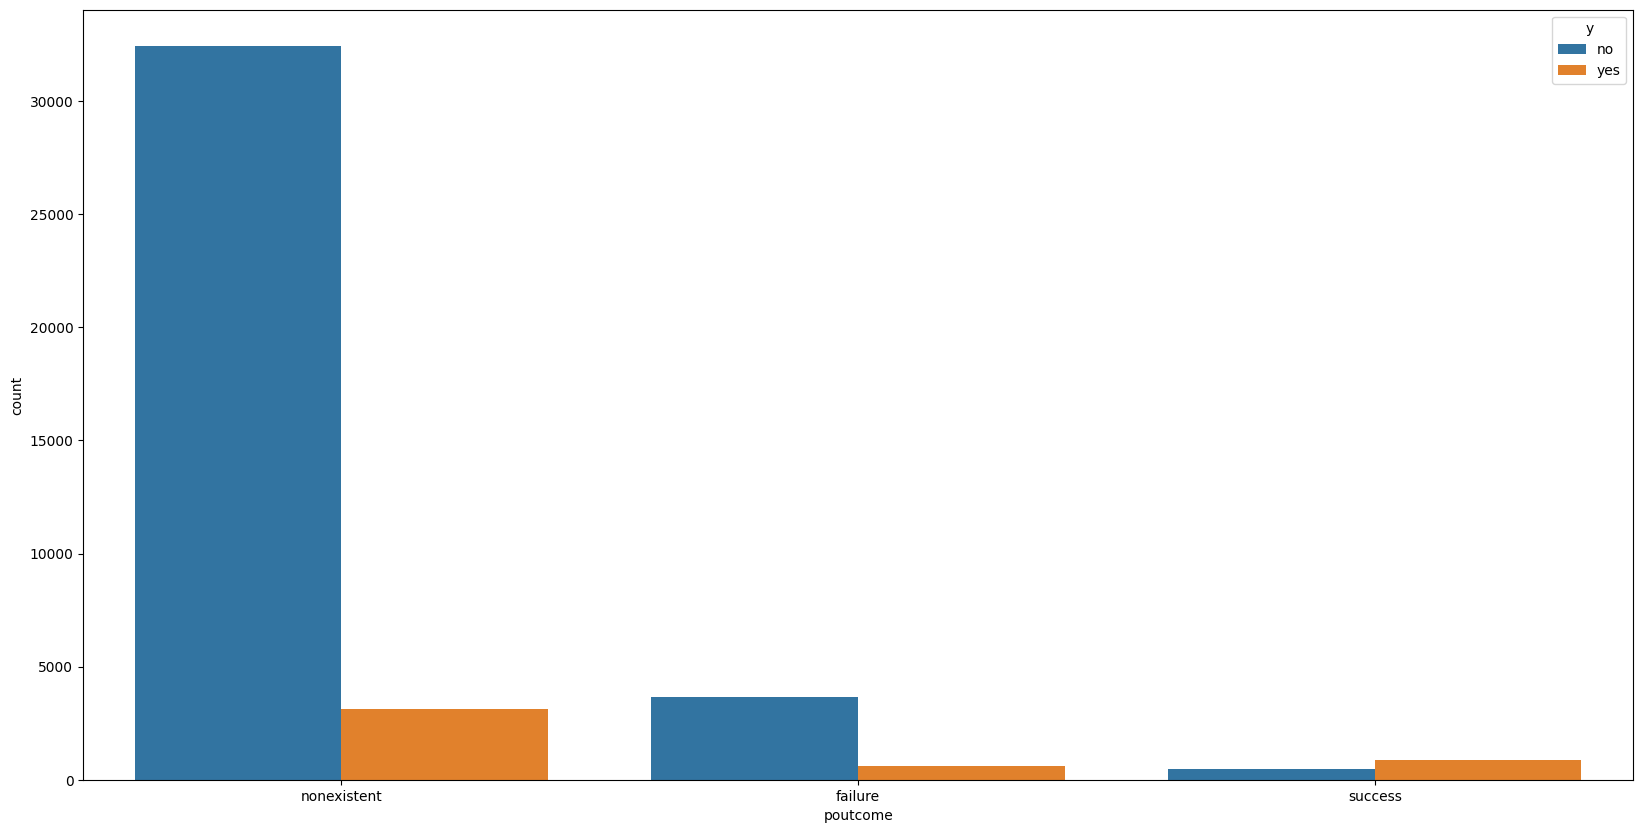

In [126]:
fig, axis = plt.subplots(figsize = (20, 10))

sns.countplot(data = data, x = "poutcome", hue = "y")

plt.show()

Esta variable tambien me ha parecido relevante observarla con atencion pues el resultado que nos arroja nos hace pensar que la campaña de marketing anterior no ha resultado ser muy efectiva puesto que inexistente esta muy por encima de success, aunque habría que analizar más a fonfo lo que incluye la campaña de marketing y el resto de variables.

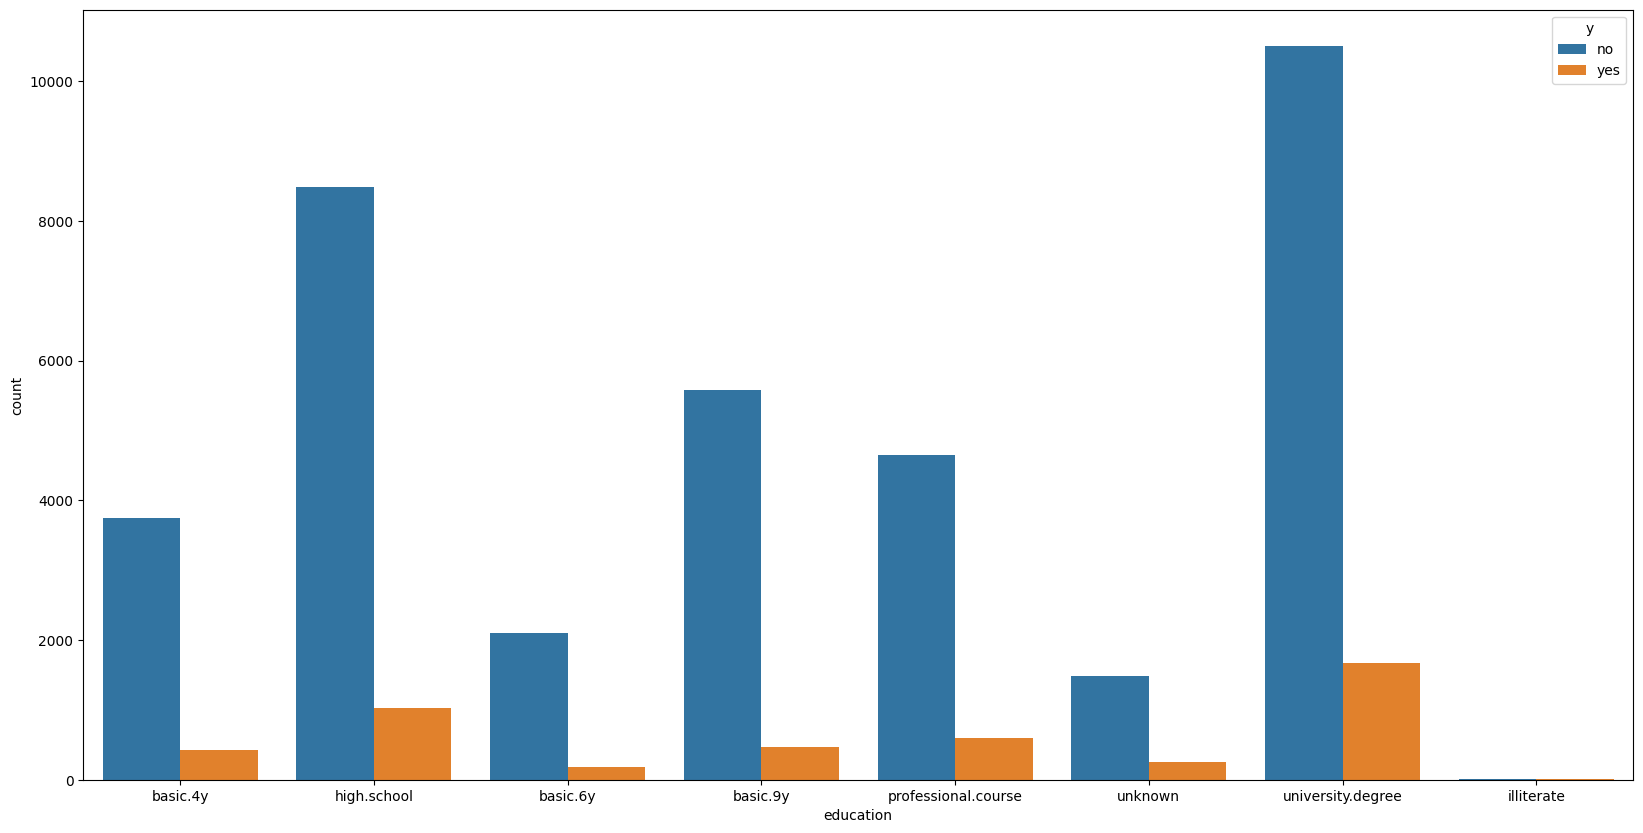

In [127]:
fig, axis = plt.subplots(figsize = (20, 10))

sns.countplot(data = data, x = "education", hue = "y")

plt.show()

Aqui vemos como los dos grupos con más estudios son los que mas contratan el servicio, tambien presentan mayor respuesta con respecto al contacto.

Análisis numérico-categórico (completo)

In [128]:
# Primero tenemos que factorizar las categoricas.
from sklearn.preprocessing import MinMaxScaler

data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["day_of_week_n"] = pd.factorize(data["day_of_week"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

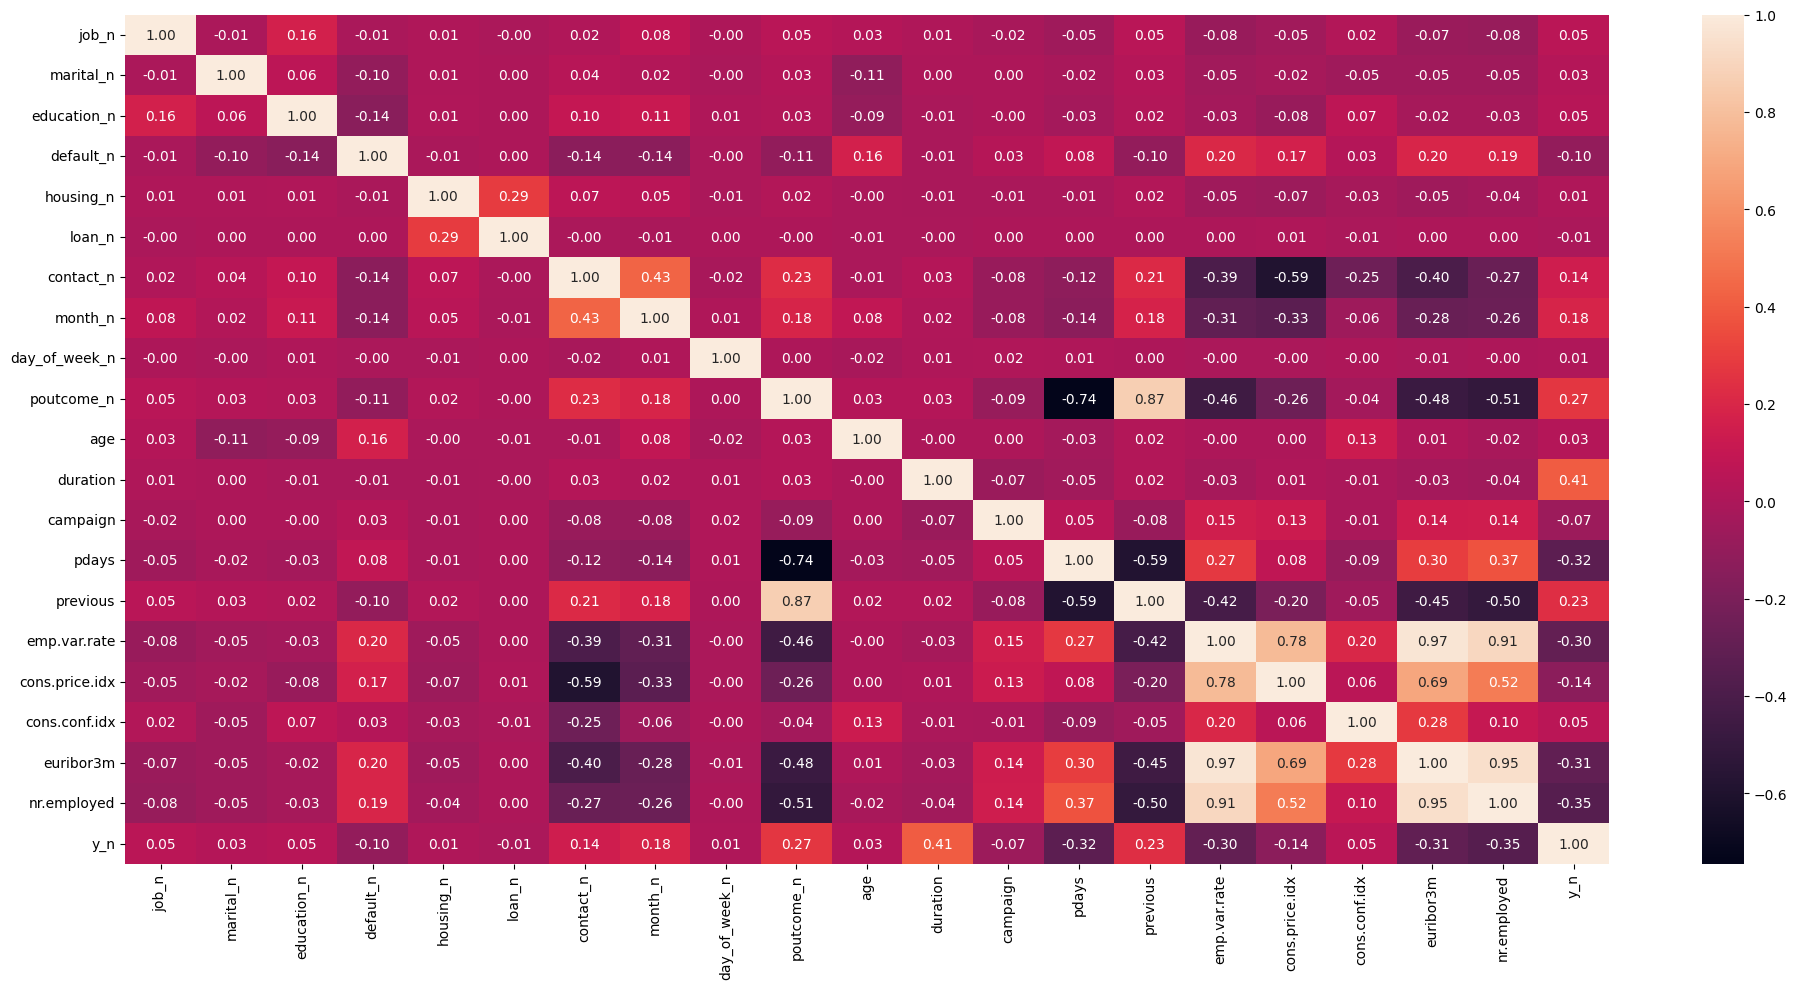

In [129]:
fig, axes = plt.subplots(figsize=(20, 10))

sns.heatmap(data[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Hay bastante correlación entre pares de variables tanto positiva como negativa.

Voy a eliminar las ultimas columnas del dataset pues no me son relevantes para optimizar los resultados

In [130]:
columns_to_drop = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
data = data.drop(columns=columns_to_drop)
#si vuelvo a ejecutar daria error porque ya estan borradas

In [131]:
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no,0,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no,1,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no,1,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no,2,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes,5,0,4,0,1,0,1,5,4,0,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no,3,0,4,0,0,0,1,5,4,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no,5,0,6,0,1,0,1,5,4,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes,4,0,4,0,0,0,1,5,4,0,1


Aunque no es el procedimiento a seguir, ahora realizo las visualizaciones de las variables numericas, pues estaba esperando para saber si eliminar las 4 últimas

Variables numéricas.


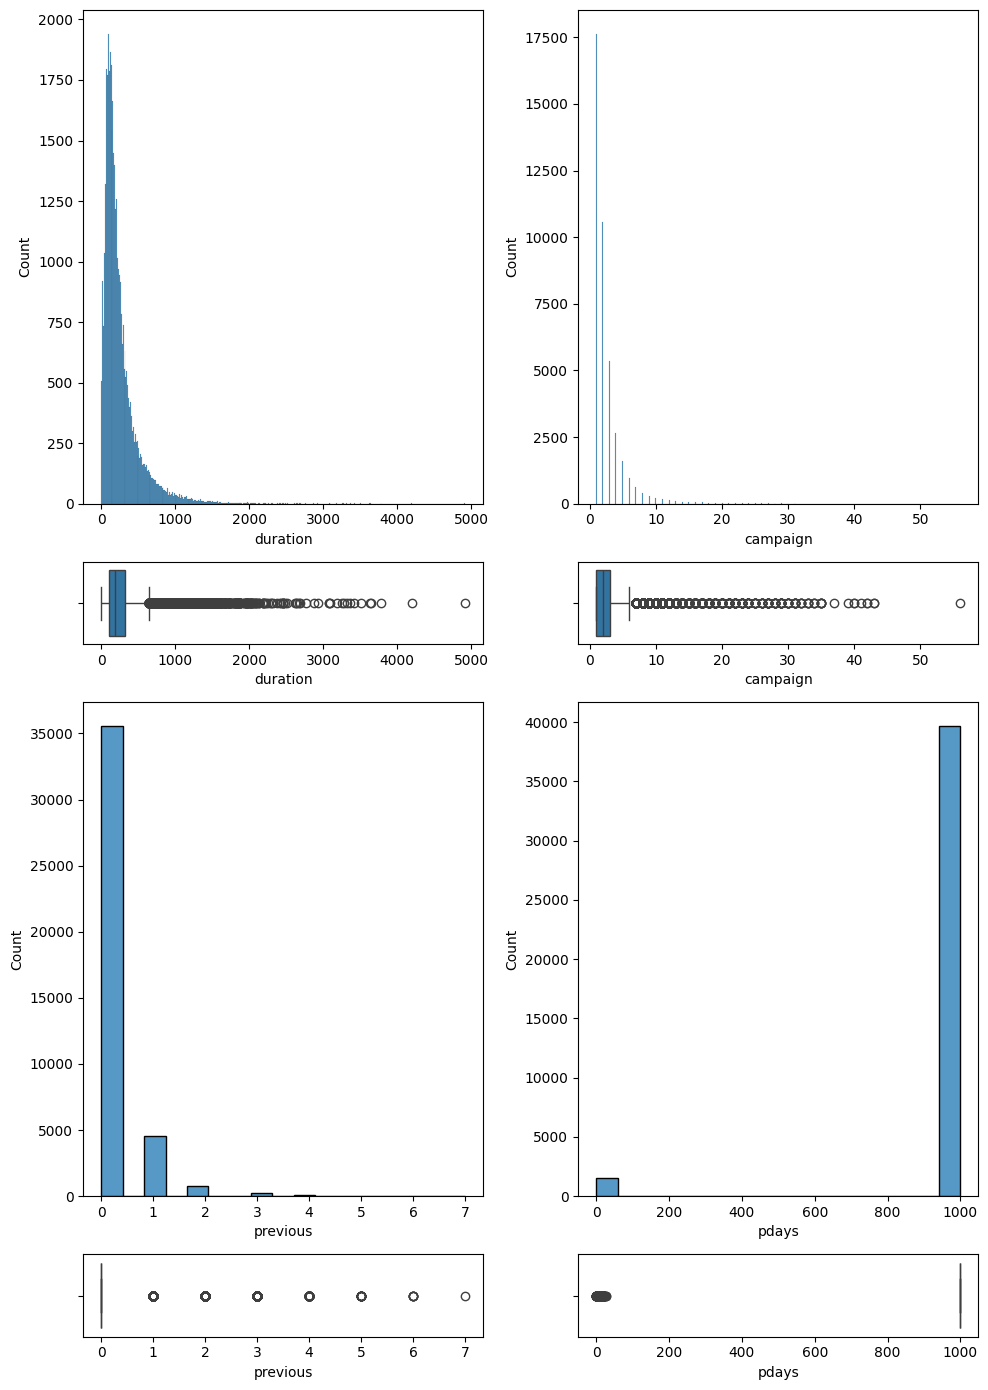

In [132]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "duration")
sns.boxplot(ax = axis[1, 0], data = data, x = "duration")

sns.histplot(ax = axis[0, 1], data = data, x = "campaign")
sns.boxplot(ax = axis[1,1], data = data, x = "campaign")

sns.histplot(ax = axis[2, 0], data = data, x = "previous")
sns.boxplot(ax = axis[3, 0], data = data, x = "previous")

sns.histplot(ax = axis[2,1], data = data, x = "pdays")
sns.boxplot(ax = axis[3, 1], data = data, x = "pdays")


plt.tight_layout()

plt.show()

In [133]:
print(data["pdays"].unique())

[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


En la variable pdays hay dos claros grupos, uno muy pequeño que contactan en menos de un mes y otro de casi 40000 con un numero muy alto de dias. Esta variable hay que mirarla bien, asi que voy a cruzarla con la variable y

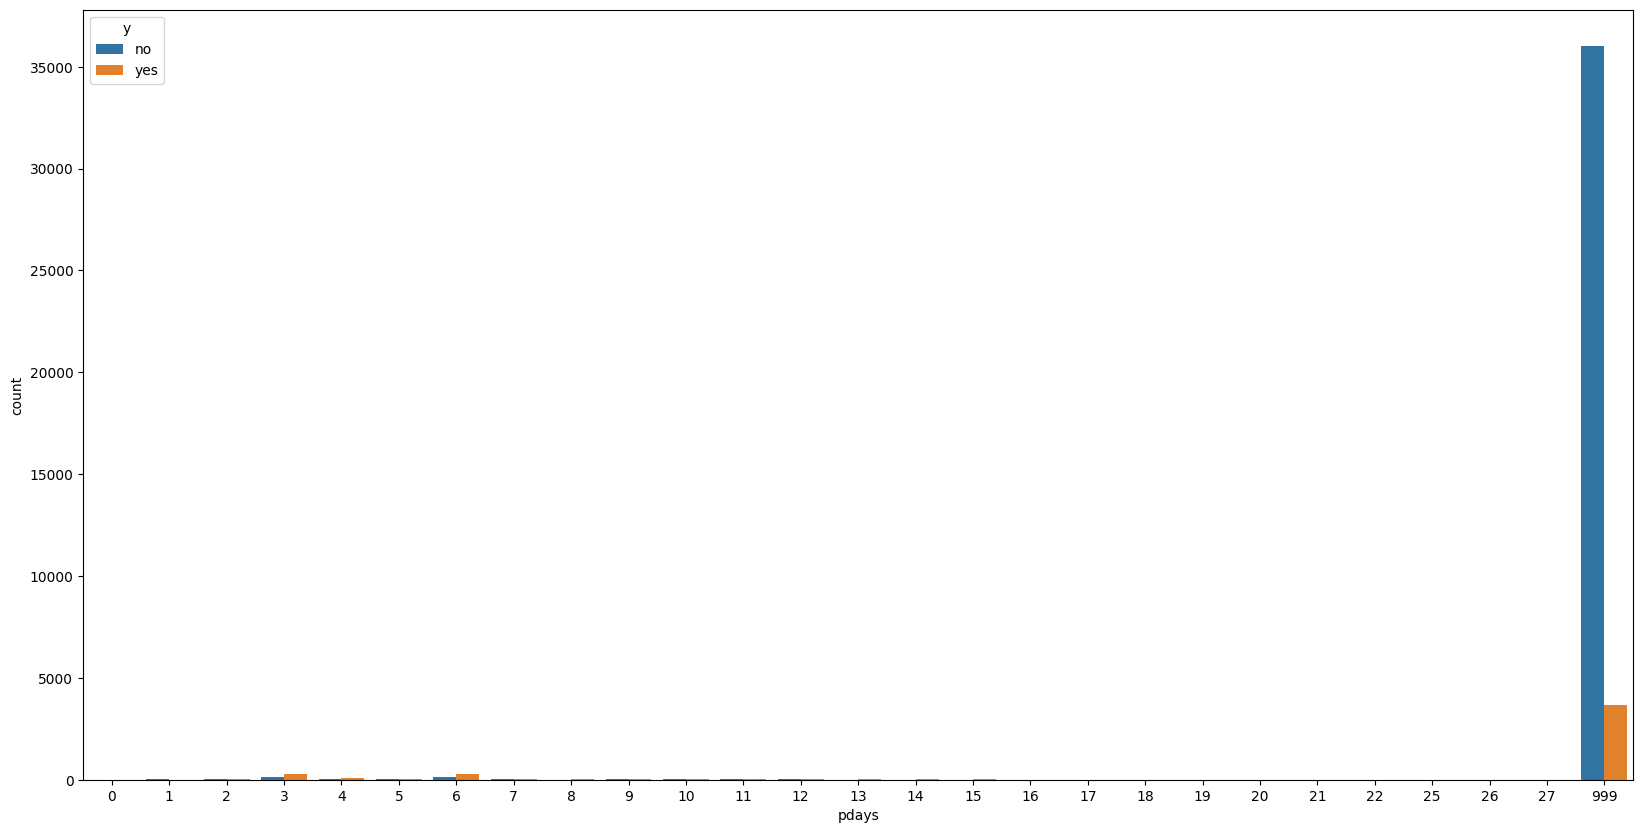

In [134]:
fig, axis = plt.subplots(figsize = (20, 10))

sns.countplot(data = data, x = "pdays", hue = "y")

plt.show()

Del grupo de 35.000 aproximadamente 3000 compraron. En comparacion con los que contactaron a los pocos días pues vemos como por ejemplo a los 3, 4 y 6 días tras el contacto ha habido una respuesta positiva por encima de la negativa

Puesto que hay dos grupos diferenciados decido dividir la variable pdays


Ingieneria de caracteristicas.



*   Datos atipicos



In [150]:
data.describe()

,age,duration,campaign,pdays,previous,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.00000,33558.000000,33558.000000
mean,40.026700,209.406133,1.801001,960.146344,0.185559,3.687377,0.508344,3.280768,0.204214,0.575273,0.199625,0.641695,2.305352,1.96585,0.182103,0.088265
std,10.494914,139.725970,0.943009,192.548688,0.511207,2.462335,0.694749,2.184236,0.403354,0.541492,0.456784,0.479510,2.481436,1.41015,0.469284,0.283684
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,104.000000,1.000000,999.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,38.000000,173.000000,2.000000,999.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.00000,0.000000,0.000000
75%,47.000000,283.000000,2.000000,999.000000,0.000000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.00000,0.000000,0.000000
max,98.000000,644.000000,4.000000,999.000000,7.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.00000,2.000000,1.000000


Miramos la media, el 50% que mas o menos debe ser similar y si no, miramos el maximo o minimo para comprobar que se descompensa por eso teniendo en su caso datos atipicos. Duracion tiene bastantes, campaña menos, previous tambien pero porque tiene muchos valores que son 0 que corresponde con lo que ya vi con pdays, con esos clientes no habia campaña de mkt y vemos como pdays ya no tiene atipicos al haberla dividido en dos jejej, es mas, todos los valores de pdays_big son 999.

Vamos a ver la variable duration:

In [136]:
duration_stats = data["duration"].describe()
duration_stats

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [137]:
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

In [138]:
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(duration_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 644.5 y -223.5, con un rango intercuartílico de 217.0


Voy a eliminar a partir de 644, creo que es la mejor opcion

In [139]:
atipicos_a_eliminar = data[data["duration"] > 644].index

In [140]:
data = data.drop(atipicos_a_eliminar)

In [141]:
data["duration"].describe()

count    38225.000000
mean       203.254833
std        141.017158
min          0.000000
25%         97.000000
50%        167.000000
75%        277.000000
max        644.000000
Name: duration, dtype: float64

Vemos como la media ha bajado a 203 y estaba en 258

Sigo con campaign

In [142]:
campaign_stats = data["campaign"].describe()
campaign_stats

count    38225.000000
mean         2.575409
std          2.810058
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

No tiene muchos valores perdidos, pero el valor maximo difiere mucho de la media, asi que probablemente los elimine

In [143]:
campaign_iqr = campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_stats["25%"] - 1.5 * campaign_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(campaign_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 4.5 y -0.5, con un rango intercuartílico de 1.0


El limite superior esta en 4.5

In [144]:
atipicos_a_eliminar_2 = data[data["campaign"] > 4.5].index

In [145]:
data = data.drop(atipicos_a_eliminar_2)

In [146]:
data["campaign"].describe()

count    33558.000000
mean         1.801001
std          0.943009
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: campaign, dtype: float64

In [147]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no,0,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no,1,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no,1,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no,2,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes,5,0,4,0,1,0,1,5,4,0,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no,3,0,4,0,0,0,1,5,4,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no,5,0,6,0,1,0,1,5,4,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes,4,0,4,0,0,0,1,5,4,0,1


Sigo con previous

In [148]:
previous_stats = data["previous"].describe()
previous_stats

count    33558.000000
mean         0.185559
std          0.511207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [149]:
previous_iqr = previous_stats["75%"] - previous_stats["25%"]
upper_limit = previous_stats["75%"] + 1.5 * previous_iqr
lower_limit = previous_stats["25%"] - 1.5 * previous_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(previous_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0


No me fío y no hago nada



*   Datos perdidos



In [153]:
data.isnull().sum().sort_values(ascending = False)

age              0
poutcome         0
poutcome_n       0
day_of_week_n    0
month_n          0
contact_n        0
loan_n           0
housing_n        0
default_n        0
education_n      0
marital_n        0
job_n            0
y                0
previous         0
job              0
pdays            0
campaign         0
duration         0
day_of_week      0
month            0
contact          0
loan             0
housing          0
default          0
education        0
marital          0
y_n              0
dtype: int64

Escalado de valores

In [155]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,duration,campaign,pdays,previous,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.405280,0.0,1.0,0.0,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.493827,0.231366,0.0,1.0,0.0,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.246914,0.350932,0.0,1.0,0.0,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.234472,0.0,1.0,0.0,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.481481,0.476708,0.0,1.0,0.0,0.0


Seleccion de caracteristicas

In [160]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = data_scal.drop("y_n", axis = 1)
y = data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,contact_n,month_n,poutcome_n,duration,previous
0,0.0,0.000000,0.0,0.363354,0.000000
1,1.0,0.000000,0.5,0.532609,0.142857
2,1.0,0.444444,0.0,0.144410,0.000000
3,0.0,0.000000,0.0,0.798137,0.000000
4,1.0,0.888889,0.0,0.611801,0.000000


In [162]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("X_train_sel.csv", index=False)
X_test_sel.to_csv("X_test_sel.csv", index=False)

# 2.Modelo de Regresion Logística

In [164]:
train_data = pd.read_csv("X_train_sel.csv")
test_data = pd.read_csv("X_train_sel.csv")

train_data.head()

,contact_n,month_n,poutcome_n,duration,previous,y_n
0,0.0,0.000000,0.0,0.363354,0.000000,0.0
1,1.0,0.000000,0.5,0.532609,0.142857,0.0
2,1.0,0.444444,0.0,0.144410,0.000000,0.0
3,0.0,0.000000,0.0,0.798137,0.000000,0.0
4,1.0,0.888889,0.0,0.611801,0.000000,0.0


In [165]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [166]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [167]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [168]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9179193430898616

# 3.Optimizacion del modelo

Busqueda en cuadricula

In [169]:
from sklearn.model_selection import GridSearchCV
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}
# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [170]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [171]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [172]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [173]:
accuracy_score(y_test, y_pred)

0.9186808820607907

Ha subido un poco mas

Buesqueda aleatoria

In [174]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=0.1, solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [175]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l1', 'C': 0.03359818286283781}


In [177]:
model_random_search = LogisticRegression(penalty = "l1", C = 0.03359818286283781, solver = "saga")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9185153301105887

Muy similar a la busqueda con cuadrícula, aleatorio un poco mas bajo